In [3]:
%pylab inline
from LMC_hernquist_a import a_value
from octopus import profiles

Populating the interactive namespace from numpy and matplotlib


In [4]:
font = {'size':20, 'family':'serif'}
matplotlib.rc('font', **font)

In [5]:
# Mass models:
Mass = [3E10, 5E10, 8E10, 1E11, 1.8E11, 2.5E11]
# Enclosed Mass:
M_tot = 1.7E10

In [6]:
# Findig the scale length
a = zeros(len(Mass))
for i in range(len(Mass)):
    a[i] = (a_value(Mass[i], M_tot))

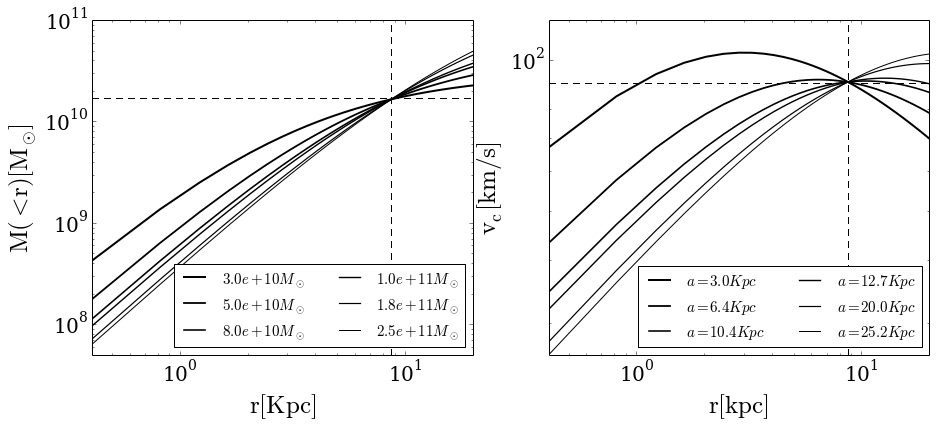

In [9]:
figsize(15,6)
r = np.linspace(0, 20)
for i in range(len(a)):
    M_r = profiles.mass_hernquist(a[i], r, Mass[i])
    v_r = profiles.vc_hernquist(a[i], r, 0, 0, Mass[i])
    subplot(1,2,1)
    loglog(r, M_r, c='k', lw=2-i/5.0, label='${:.1e} M_\odot$'.format(Mass[i]))
    axvline(8.7, ls='--', c='k')
    axhline(1.7E10, ls='--', c='k')
    xlim(0, 20)
    ylim(5E7, 1E11)
    xlabel('$\mathrm{r[Kpc]}$', fontsize=25)
    ylabel('$\mathrm{M(<r)[M_{\odot}]}$', fontsize=25)
    legend(ncol=2, fontsize=15, loc='lower right')
    
    subplot(1,2,2)
    loglog(r, v_r, c='k', lw=2-i/5.0, label='$a = {:.1f}Kpc$'.format(a[i]))
    axvline(8.7, ls='--', c='k')
    axhline(90, ls='--', c='k')
    xlim(0, 20)
    ylim(0, 120)
    legend(ncol=2, fontsize=15, loc='lower right')
    xlabel('$\mathrm{r[kpc]}$', fontsize=25)
    ylabel('$\mathrm{v_c[km/s]}$', fontsize=25)
savefig('LMC_models.png', dpi=100, bbox_inches='tight')